<a href="https://colab.research.google.com/github/pmilks/cap-comp215/blob/main/Final%20Project%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COMP215 - Project 2 - Cellular Automata

### Import Libraries

In [13]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import animation
from scipy.signal import correlate2d
import time
import timeit

matplotlib.rc('animation', html='jshtml')

DEFAULT_IMSHOW_OPTIONS = dict(
    cmap='Blues',
    interpolation='none',
    origin='upper',
)


def plot_2D_array(array, axes=None, title='', **options):
    """ Plot the 2D array as an image on the given axes  1's will be dark blue, 0's will be light blue. """
    axes = axes or plt.gca()  # If not axes are provided, draw on current axes
    axes.set_title(title)
    axes.set_xticks([], [])  # remove axes tick marks
    axes.set_yticks([], [])
    options = {**DEFAULT_IMSHOW_OPTIONS, **options}
    axes.imshow(array, **options)

### Animation Class 
from Lab 7-10 by Joseph Fall

In [14]:
class Animation2D:
  def __init__(self, model, frames=50, steps_per_frame=1, figsize=(8,8)):
    self.model = model
    self.frames = frames
    self.steps_per_frame = steps_per_frame
    self.fig, self.ax = plt.subplots(figsize=figsize)

  def animation_step(self, step):
      if step > 0:
          for _ in range(self.steps_per_frame):
              self.model.step()
      self.model.draw(self.ax, step=step * self.steps_per_frame)

  def show(self):
      anim = animation.FuncAnimation(self.fig, self.animation_step, frames=self.frames)
      plt.close() 
      return anim

  def animate(self, interval=None):
      from IPython.display import clear_output
      try:
          for i in range(self.frames):
              clear_output(wait=True)  
              self.ax.clear() 
              plt.figure(self.fig)
              self.animation_step(i)
              plt.show()  
              if interval:
                  time.sleep(interval)
      except KeyboardInterrupt:
          pass

### Langford's Ant (coordinate system)
Animation

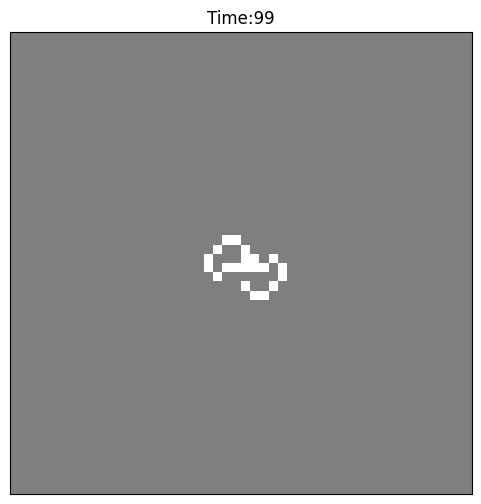

In [15]:
directions = [(-1,0),(0,1),(1,0),(0,-1)]
steps = 100

class Ant:
  def __init__(self, n, index):
    self.n = n
    self.state = np.ones((n,n), dtype=np.int8)
    self.ant_row = n//2
    self.ant_col = n//2
    self.index = index

  def start_state(self, new_state):
    new_state = np.pad(new_state,pad_width=self.n-len(new_state))
    self.state = new_state

  def step(self):
    if self.state[self.ant_row, self.ant_col] > 0:
      self.index += 1
    else:
      self.index -= 1
    self.state[self.ant_row, self.ant_col] *= -1
    if self.index > 3:
      self.index = 0
    elif self.index < 0:
      self.index = 3
    self.ant_row += directions[self.index][0]
    self.ant_col += directions[self.index][1]
    
  def draw(self, axes=None, step=''):
      axes = axes or plt.axes
      title = f'Time:{step}'
      plot_2D_array(self.state, axes=axes, title=title,
                    cmap='binary', vmin=0, vmax=2)

a = Ant(50,1)
anim = Animation2D(a, frames=steps,steps_per_frame=1,figsize=(6,6))
anim.animate(interval=0.1)

### Complexity

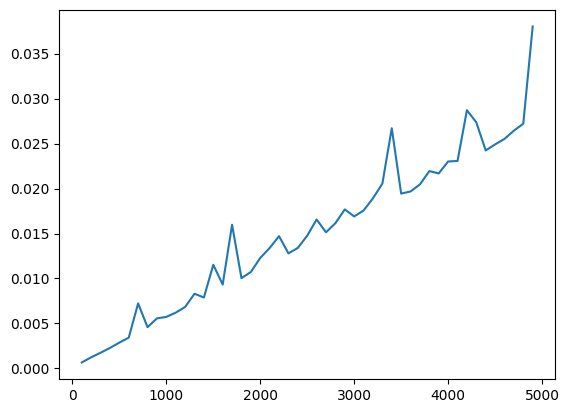

In [16]:
times = {}
for i in range(100,5000,100):
  a = Ant(10000,1)
  times[i] = timeit.timeit(a.step,number=i)

plt.plot(times.keys(),times.values()) #time complexity = O(n)


Complexity is O(n) as # of calculations increases linearly with n.


### Initial Patterns and Behaviour

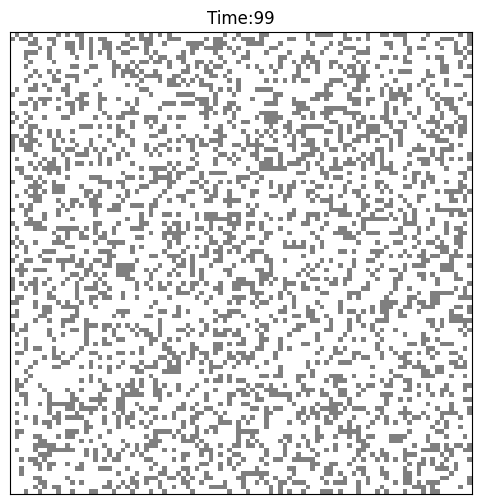

In [27]:
'''
Explore effect of changing initial starting orientation
'''
str_dir = 1
a = Ant(10,str_dir)
anim = Animation2D(a, frames=30,steps_per_frame=1,figsize=(6,6))
anim.animate(interval=0.1)

'''
Explore effect of changing the starting state
'''
a = Ant(10,0)
start = np.random.choice([-1,1], size=(10,10), p=[0.7,0.3])
a.start_state(start)
anim = Animation2D(a, frames=30,steps_per_frame=1,figsize=(6,6))
anim.animate(interval=0.1)

Future development could explore changing the ruleset of Langton's Ant
- Adding more colours
- Adding more ants

Extensions of states can produce simple, choatic or repeating patterns
that emerge after a number of steps
- Ex. Highways, Spirals, etc.

### Langton's Ant (Matrix System) 
INCOMPLETE

In [ ]:
"""
Ant Board & Color Board
Iterate through directions, changing order depending on color
Directions:
"""
down = np.array([[0, 1, 0],
    [0, 0, 0],
    [0, 0, 0]])
left = np.array([[0, 0, 0],
        [0, 0, 1],
        [0, 0, 0]])
up = np.array([[0, 0, 0],
      [0, 0, 0],
      [0, 1, 0]])
right = np.array([[0, 0, 0],
      [1, 0, 0],
      [0, 0, 0]])
directions = [left, up, right, down]


a = np.array([[1, 1, 1, 1, -1,],
              [1, 1, 1, 1, 1,],
              [1, -1, -3, 1, 1,],
              [1, 1, 1, 1, 1,],
              [1, 1, 1, 1, 1,]])
kernel = np.array([[0,0,0],
                   [0,0,1],
                   [0,0,0]]) #left move

'''           [[1, -1, 1, 1, 1,],
              [1, 1, -2, 1, 1,],
              [1, -1, 1, -1, 1,],
              [1, 1, -1, 1, 1,],
              [1, 1, 1, 1, 1,]]'''

class Langton2D:
  WHITE = 1
  BLACK = -1
  ANT_W_L = 2
  ANT_W_U = 3
  ANT_W_R = 4
  ANT_W_D = 5
  ANT_B_L = -2
  ANT_B_U = -3
  ANT_B_R = -4
  ANT_B_D = -5

  cmap = [(1,1,1), (0,0,0), (1, 0.6, 0.6), (1, 1, 0.8), (0.6, 0.8, 1), (0.8, 0.6, 1), (0.6, 0, 0), (0.8, 0.8, 0), (0, 0, 0.6), (0.3, 0, 0.6)]
  cmap[WHITE] = (1,1,1)
  cmap[BLACK] = (0,0,0)
  cmap[ANT_W_L] = (1, 0.6, 0.6)
  cmap[ANT_W_U] = (1, 1, 0.8)
  cmap[ANT_W_R] = (0.6, 0.8, 1)
  cmap[ANT_W_D] = (0.8, 0.6, 1)
  cmap[ANT_B_L] = (0.6, 0, 0)
  cmap[ANT_B_U] = (0.8, 0.8, 0)
  cmap[ANT_B_R] = (0, 0, 0.6)
  cmap[ANT_B_D] = (0.3, 0, 0.6)

  ant_colour_map = matplotlib.colors.ListedColormap(cmap)

  def __init__(self, ant, n_rows, n_cols=None):
    n_cols = n_cols or n_rows
    self.ant = ant
    self.state = np.ones((n_rows, n_cols), dtype=np.int64)
    self.state[n_rows//2,n_cols//2] = self.ant

  def move(self):
    return directions[abs(self.ant)-2]

  def change_ant(self, move):
    new = self.state*move
    diff = self.state != new
    if (self.state[diff][0]) < 0:
      self.ant = abs(self.ant) * -1
    else:
      self.ant += 1
      if self.ant > 5:
        self.ant = 2
      elif self.ant == -1:
        self.ant = -5

  def step(self):
    kernel = self.move()
    ant_move = correlate2d(abs(self.state),kernel,boundary='wrap',mode='same')

    self.change_ant(ant_move)

    w_ant = self.state > 1
    b_ant = self.state < -1
    self.state[w_ant] = -1
    self.state[b_ant] = 1

    self.state *= ant_move

    self.state[abs(self.state)>1] = self.ant 

  def draw(self, axes=None, step=''):
        axes = axes or plt.axes
        title = f'Time:{step}'
        plot_2D_array(self.state, axes=axes, title=title,
                      cmap=self.ant_colour_map, vmin=0, vmax=len(self.ant_colour_map.colors))
a = Langton2D(2,9)
anim = Animation2D(a, frames=100, figsize=(6,6))
anim.animate(0.1)

Can't:
- Change ant space to black
- Colour mapping in animation
  - Displaying black tiles
  - Displaying orientation on black tiles
  - Displaying any orientation past step 6